# Credit information analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

<hr>

**[Problem 1] Understanding the content of the competition**

<hr>


## What kind of company is Home Credit?

Home Credit to increase financial inclusion for the unbanked by offering a safe borrowing environment for individuals with poor or no credit histories to obtain loans, primarily through Home Credit, a variety of telcos
and transaction data. Using alternate data, forecast the client's ability to pay.

## What is expected in this competition?

Using different statistics and machine learning techniques, predicting a client's repayment ability. Repayment skills of the debtor 0: Repaid (credit) person Client who is difficult to pay = client first If you are late for X days or more, you must pay in Y installments at least once.

## What are the benefits companies can gain by predicting this?

Gather (predict) information for a customer who will initially repay in order to become a (trustworthy) person who is funded by a lender.


In [2]:
application_train = pd.read_csv("application_train.csv")

application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<hr>

**[Problem 2] Understanding the overview of data**

<hr>


In [3]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
total = application_train.isnull().sum()
missing_ratio = (application_train.isnull().sum() / application_train.isnull().count()) * 100

table_missing = pd.concat((total, missing_ratio), axis=1, keys=['total', "missing_ratio"])

table_missing = table_missing.sort_values(by = ['total'], ascending=False)

table_missing[table_missing['total'] > 0]

,total,missing_ratio
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
...,...,...
EXT_SOURCE_2,660,0.214626
AMT_GOODS_PRICE,278,0.090403
AMT_ANNUITY,12,0.003902
CNT_FAM_MEMBERS,2,0.000650


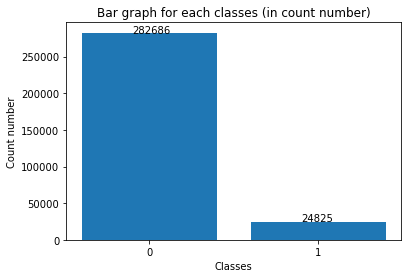

In [7]:
d = application_train['TARGET'].value_counts()

lists = []

for i in d:
    lists.append(i / d.sum() * 100)

plt.title("Bar graph for each classes (in count number)")
plt.xlabel("Classes")
plt.ylabel("Count number")
plt.bar(d.index, d.values)
plt.xticks(d.index)
for i,v in enumerate(d):
    plt.text(i-0.1, v + 50, "{}".format(v))
plt.show()

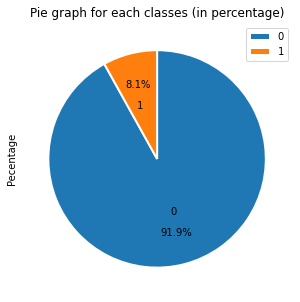

In [8]:
df2 = pd.DataFrame({'Classes' : d.index,
                    'Pecentage': (d.values / d.sum() * 100)})

df2.set_index('Classes')

plot = df2.plot.pie(title= 'Pie graph for each classes (in percentage)', y='Pecentage',labels = df2['Classes'], figsize=(5, 5), autopct='%1.1f%%', startangle=90, labeldistance=0.5,pctdistance=0.7, wedgeprops={'linewidth': 2, 'edgecolor':"white"}, counterclock=False)

<hr>

**[Problem 3] Defining issues**

<hr>

* Find the associations of strong correlation coefficients using a heat map of the correlation coefficient matrix.
* Check the association between AMT CREDIT and TARGET to find functions that have a strong correlation with the target attribute.
* What kind of debt is more likely to be paid late?
* Check to see if people who own cars are more likely to put off paying their debts.
* type of the loans taken and also, on a separate plot, the percent of the loans (by type of the loan) with TARGET value 1 (not returned loan).
* the gender of the clients
* Most of clients are married, followed by Single/not married and civil marriage. In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment (10%), with Widow the lowes (exception being Unknown).


<hr>

**[Problem 4] Data exploration**

<hr>


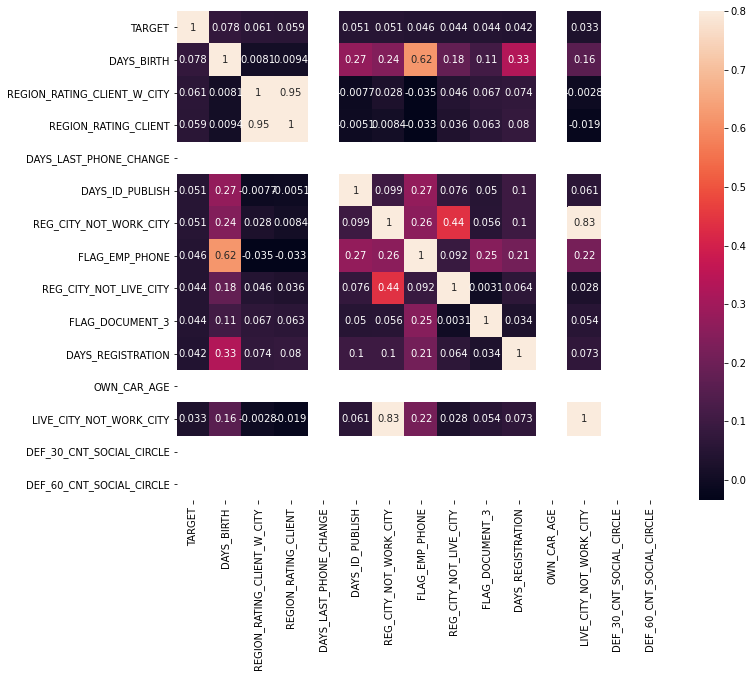

In [9]:
corrmat = application_train.corr()
number_of_selected_variables = 15
selected_cols = corrmat.nlargest(number_of_selected_variables,'TARGET')['TARGET'].index
correlation_coefficient = np.corrcoef(application_train[selected_cols].values.T)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlation_coefficient, vmax=.8, square=True, yticklabels=selected_cols.values, xticklabels=selected_cols.values,annot=True)

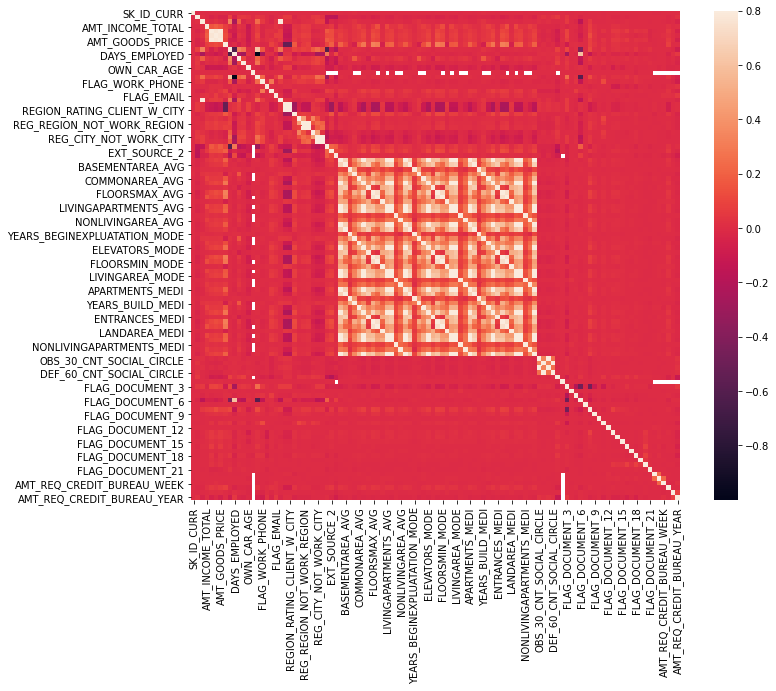

In [10]:
f, ax =plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

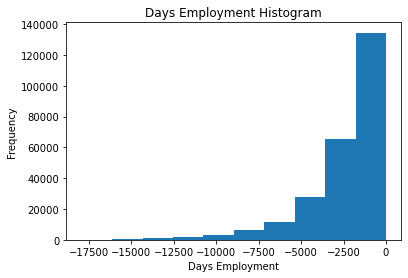

In [11]:
application_train['DAYS_EMPLOYED_ANOM'] = application_train["DAYS_EMPLOYED"] == 365243
application_train['DAYS_EMPLOYED'].replace({365243:np.nan},inplace=True)

application_train['DAYS_EMPLOYED'].plot.hist(title='Days Employment Histogram');
plt.xlabel('Days Employment');

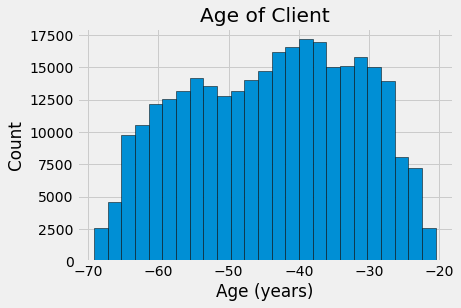

In [12]:
plt.style.use('fivethirtyeight')
plt.hist(application_train['DAYS_BIRTH']/365, edgecolor='k',bins=25)
plt.title('Age of Client');
plt.xlabel('Age (years)');
plt.ylabel('Count');


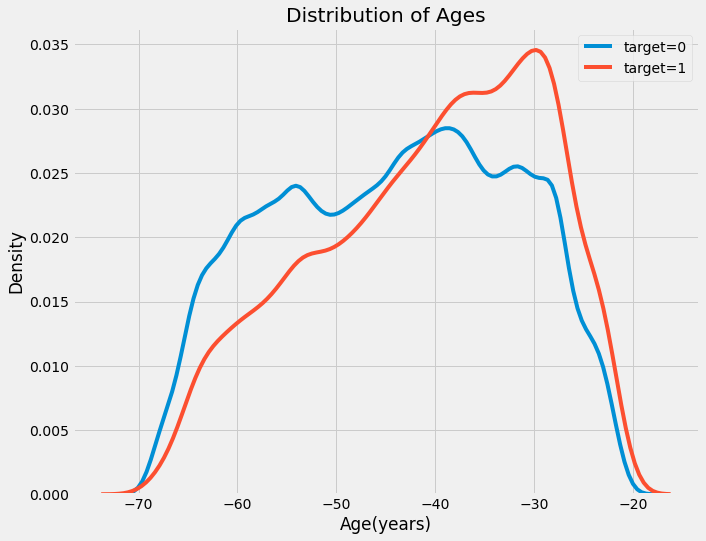

In [13]:
plt.figure(figsize=(10,8))
sns.kdeplot(application_train.loc[application_train['TARGET']==0,'DAYS_BIRTH']/365,label='target=0')
sns.kdeplot(application_train.loc[application_train['TARGET']==1,'DAYS_BIRTH']/365,label='target=1')
plt.xlabel('Age(years)');
plt.ylabel('Density');
plt.title('Distribution of Ages');

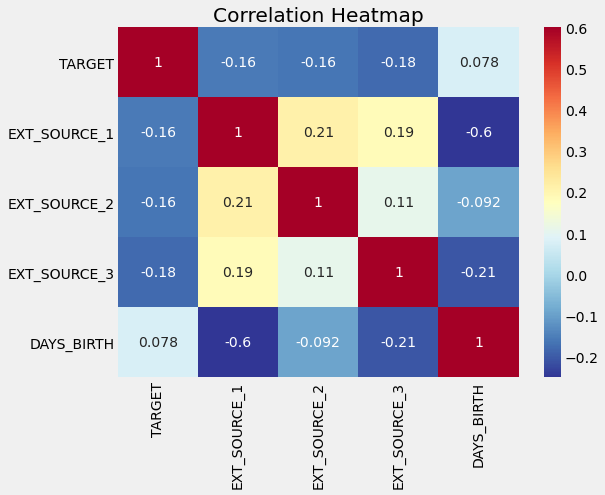

In [14]:
ext_data= application_train[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]
ext_data_corrs=ext_data.corr()
plt.figure(figsize=(8,6))

sns.heatmap(ext_data_corrs, cmap=plt.cm.RdYlBu_r, vmin=-0.25, annot=True, vmax=0.6)
plt.title('Correlation Heatmap');


* Since the EXT_SOURCE and TARGET variables have a negative correlation, it can be interpreted as meaning that the higher the EXT_SOURCE value, the better the loan repayment.
* Also, as the DAYS_BIRTH variable has a high positive correlation with the EXT_SOURCE_1 variable, it is estimated that one of these scores is the age of the customer.
* Next, let's look at the distribution by dividing each EXT_SOURCE by TARGET value.

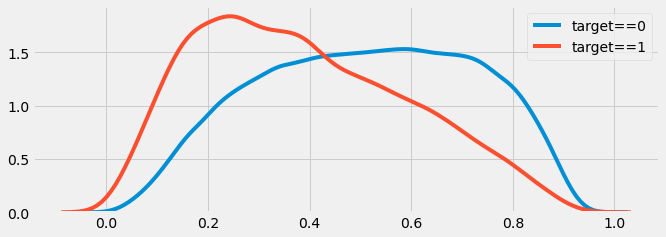

In [15]:
plt.figure(figsize=(10,12))
plt.subplot(3,1,1);
sns.kdeplot(application_train.loc[application_train['TARGET']==0, 'EXT_SOURCE_1'],label='target==0')
sns.kdeplot(application_train.loc[application_train['TARGET']==1, 'EXT_SOURCE_1'],label='target==1');

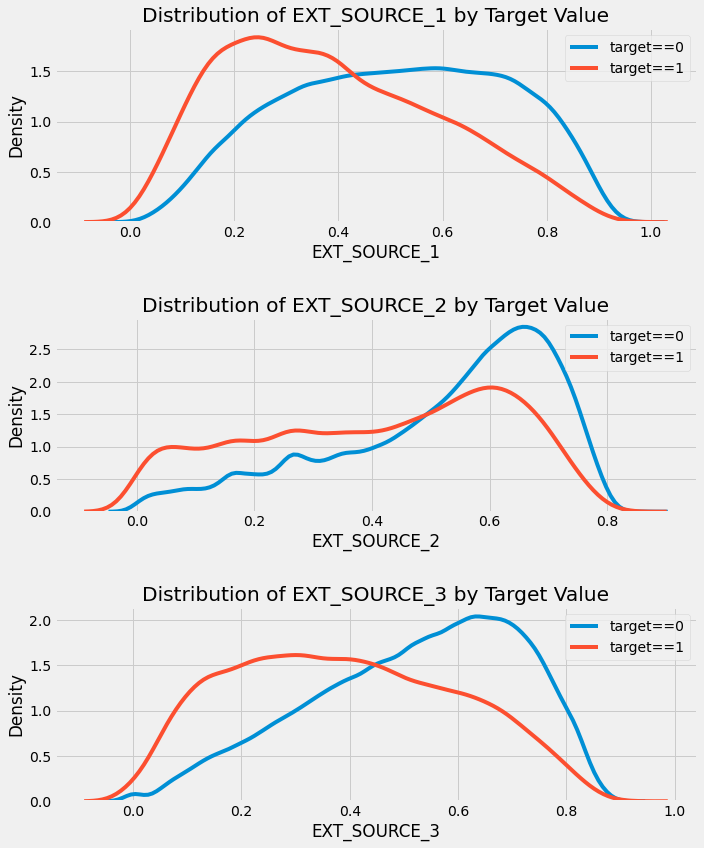

In [16]:
plt.figure(figsize=(10,12))
for i, source in enumerate(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']):
    plt.subplot(3,1,i+1)
    
    sns.kdeplot(application_train.loc[application_train['TARGET']==0,source],label='target==0')
    sns.kdeplot(application_train.loc[application_train['TARGET']==1,source],label='target==1')
    
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' %source);
    plt.ylabel('Density');

plt.tight_layout(h_pad=2.5)

* The EXT_SOURCE_3 variable seems to have the greatest difference depending on the target value.
* Although the correlation coefficient with target is not very high, it can be judged as a major variable that affects the model as the value is different depending on whether the target is 0 or 1.